<a href="https://colab.research.google.com/github/AppagoniSrinidhi/UNP-INTERNSHIP/blob/main/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import datetime

In [3]:
data = pd.read_excel("Housing.xlsx",index_col=0)
data

,LandUse,PropertyAddress,SaleDate,SalePrice,Acre,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
UniqueID,,,,,,,,,,,,
2045.0,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000.0,2.3,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0
16918.0,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000.0,3.5,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0
54582.0,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000.0,2.9,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0
43070.0,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000.0,2.6,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0
22714.0,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000.0,2.0,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
30469.0,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE",2015-05-27,157500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27707.0,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE",2015-03-02,145000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52709.0,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE",2016-08-16,234611.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


CLEANING DATA

1.Replace the missing values with appropriate approximations

In [4]:
data['Acre']=data["Acre"].fillna(np.mean(data["Acre"]))
data['LandValue']=data["LandValue"].fillna(np.mean(data["LandValue"]))
data['BuildingValue']=data["BuildingValue"].fillna(np.mean(data["BuildingValue"]))
data['TotalValue']=data["TotalValue"].fillna(np.mean(data["TotalValue"]))
data['YearBuilt']=data["YearBuilt"].fillna(np.mean(data["YearBuilt"]))
data['Bedrooms']=data["Bedrooms"].fillna(np.mean(data["Bedrooms"]))
data['FullBath']=data["FullBath"].fillna(np.mean(data["FullBath"]))
data['HalfBath']=data["HalfBath"].fillna(np.mean(data["HalfBath"]))
data

,LandUse,PropertyAddress,SaleDate,SalePrice,Acre,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
UniqueID,,,,,,,,,,,,
2045.0,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000.0,2.300000,50000.000000,168200.000000,235700.000000,1986.000000,3.000000,3.000000,0.000000
16918.0,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000.0,3.500000,50000.000000,264100.000000,319000.000000,1998.000000,3.000000,3.000000,2.000000
54582.0,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000.0,2.900000,50000.000000,216200.000000,298000.000000,1987.000000,4.000000,3.000000,0.000000
43070.0,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000.0,2.600000,50000.000000,147300.000000,197300.000000,1985.000000,3.000000,3.000000,0.000000
22714.0,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000.0,2.000000,50000.000000,152300.000000,202300.000000,1984.000000,4.000000,3.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
30469.0,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE",2015-05-27,157500.0,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921
27707.0,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE",2015-03-02,145000.0,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921
52709.0,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE",2016-08-16,234611.0,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921


1.Rename the columns to better suited names

In [5]:
data.rename(columns={"FullBath":"FullBathroom"},inplace=True)
data.rename(columns={"HalfBath":"HalfBathroom"},inplace=True)
data

,LandUse,PropertyAddress,SaleDate,SalePrice,Acre,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBathroom,HalfBathroom
UniqueID,,,,,,,,,,,,
2045.0,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000.0,2.300000,50000.000000,168200.000000,235700.000000,1986.000000,3.000000,3.000000,0.000000
16918.0,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000.0,3.500000,50000.000000,264100.000000,319000.000000,1998.000000,3.000000,3.000000,2.000000
54582.0,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000.0,2.900000,50000.000000,216200.000000,298000.000000,1987.000000,4.000000,3.000000,0.000000
43070.0,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000.0,2.600000,50000.000000,147300.000000,197300.000000,1985.000000,3.000000,3.000000,0.000000
22714.0,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000.0,2.000000,50000.000000,152300.000000,202300.000000,1984.000000,4.000000,3.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
30469.0,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE",2015-05-27,157500.0,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921
27707.0,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE",2015-03-02,145000.0,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921
52709.0,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE",2016-08-16,234611.0,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921


1.Extract the month and year from the sale date.

In [6]:
data['Year']=pd.DatetimeIndex(data['SaleDate']).year
data['Month']=pd.DatetimeIndex(data['SaleDate']).month
data['Day']=pd.DatetimeIndex(data['SaleDate']).day
data

,LandUse,PropertyAddress,SaleDate,SalePrice,Acre,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBathroom,HalfBathroom,Year,Month,Day
UniqueID,,,,,,,,,,,,,,,
2045.0,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000.0,2.300000,50000.000000,168200.000000,235700.000000,1986.000000,3.000000,3.000000,0.000000,2013,4,9
16918.0,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000.0,3.500000,50000.000000,264100.000000,319000.000000,1998.000000,3.000000,3.000000,2.000000,2014,6,10
54582.0,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000.0,2.900000,50000.000000,216200.000000,298000.000000,1987.000000,4.000000,3.000000,0.000000,2016,9,26
43070.0,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000.0,2.600000,50000.000000,147300.000000,197300.000000,1985.000000,3.000000,3.000000,0.000000,2016,1,29
22714.0,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000.0,2.000000,50000.000000,152300.000000,202300.000000,1984.000000,4.000000,3.000000,0.000000,2014,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30469.0,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE",2015-05-27,157500.0,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2015,5,27
27707.0,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE",2015-03-02,145000.0,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2015,3,2
52709.0,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE",2016-08-16,234611.0,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2016,8,16


1.Extract the pin number from the property address

In [7]:
data['Pin'] = data['PropertyAddress'].str.slice(0, 4)
data


,LandUse,PropertyAddress,SaleDate,SalePrice,Acre,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBathroom,HalfBathroom,Year,Month,Day,Pin
UniqueID,,,,,,,,,,,,,,,,
2045.0,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000.0,2.300000,50000.000000,168200.000000,235700.000000,1986.000000,3.000000,3.000000,0.000000,2013,4,9,1808
16918.0,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000.0,3.500000,50000.000000,264100.000000,319000.000000,1998.000000,3.000000,3.000000,2.000000,2014,6,10,1832
54582.0,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000.0,2.900000,50000.000000,216200.000000,298000.000000,1987.000000,4.000000,3.000000,0.000000,2016,9,26,1864
43070.0,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000.0,2.600000,50000.000000,147300.000000,197300.000000,1985.000000,3.000000,3.000000,0.000000,2016,1,29,1853
22714.0,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000.0,2.000000,50000.000000,152300.000000,202300.000000,1984.000000,4.000000,3.000000,0.000000,2014,10,10,1829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30469.0,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE",2015-05-27,157500.0,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2015,5,27,1435
27707.0,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE",2015-03-02,145000.0,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2015,3,2,1423
52709.0,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE",2016-08-16,234611.0,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2016,8,16,1804


In [8]:
data['Property'] = data['PropertyAddress'].str.slice(18, 32)
data


,LandUse,PropertyAddress,SaleDate,SalePrice,Acre,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBathroom,HalfBathroom,Year,Month,Day,Pin,Property
UniqueID,,,,,,,,,,,,,,,,,
2045.0,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000.0,2.300000,50000.000000,168200.000000,235700.000000,1986.000000,3.000000,3.000000,0.000000,2013,4,9,1808,", GOODLETTSVIL"
16918.0,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000.0,3.500000,50000.000000,264100.000000,319000.000000,1998.000000,3.000000,3.000000,2.000000,2014,6,10,1832,", GOODLETTSVIL"
54582.0,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000.0,2.900000,50000.000000,216200.000000,298000.000000,1987.000000,4.000000,3.000000,0.000000,2016,9,26,1864,", GOODLETTSVIL"
43070.0,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000.0,2.600000,50000.000000,147300.000000,197300.000000,1985.000000,3.000000,3.000000,0.000000,2016,1,29,1853,", GOODLETTSVIL"
22714.0,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000.0,2.000000,50000.000000,152300.000000,202300.000000,1984.000000,4.000000,3.000000,0.000000,2014,10,10,1829,", GOODLETTSVIL"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30469.0,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE",2015-05-27,157500.0,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2015,5,27,1435,"K DR, NOLENSVI"
27707.0,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE",2015-03-02,145000.0,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2015,3,2,1423,"K DR, NOLENSVI"
52709.0,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE",2016-08-16,234611.0,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2016,8,16,1804,"LN, NOLENSVILL"


EDA

1.How has the price of properties changed over the years

In [9]:
a = data.groupby('Year')['SalePrice'].count()
a

Year
2013    11292
2014    14283
2015    16829
2016    14071
2019        2
Name: SalePrice, dtype: int64

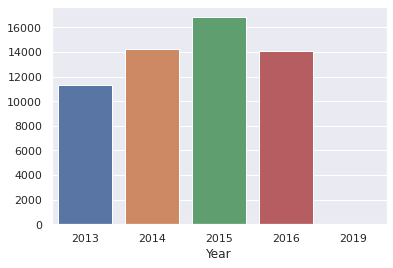

In [10]:
sns.barplot(x=a.index, y=a.values)

1.Does a specific month or span of months have the highest property prices?

In [11]:
b=data.groupby('Month')['SalePrice'].count()
b

Month
1     3227
2     2778
3     4474
4     5223
5     5932
6     6593
7     5471
8     5620
9     5451
10    4822
11    3114
12    3772
Name: SalePrice, dtype: int64

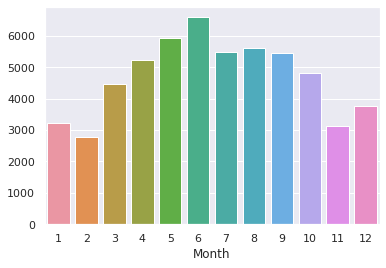

In [12]:
sns.barplot(x=b.index, y=b.values)

1.For what purpose were the properties generally purchased?

In [13]:
c=data.groupby('LandUse')['SalePrice'].count()
c

LandUse
APARTMENT: LOW RISE (BUILT SINCE 1960)            2
CHURCH                                           34
CLUB/UNION HALL/LODGE                             1
CONDO                                           247
CONDOMINIUM OFC  OR OTHER COM CONDO              35
CONVENIENCE MARKET WITHOUT GAS                    1
DAY CARE CENTER                                   2
DORMITORY/BOARDING HOUSE                         19
DUPLEX                                         1373
FOREST                                           10
GREENBELT                                        10
GREENBELT/RES\nGRRENBELT/RES                      3
LIGHT MANUFACTURING                               1
METRO OTHER THAN OFC, SCHOOL,HOSP, OR PARK        1
MOBILE HOME                                      20
MORTUARY/CEMETERY                                 1
NIGHTCLUB/LOUNGE                                  1
NON-PROFIT CHARITABLE SERVICE                     2
OFFICE BLDG (ONE OR TWO STORIES)                  2
ONE 

In [14]:
x=c.head()

In [15]:
y=c.tail()

([<matplotlib.patches.Wedge at 0x7fa32eb30150>,
 [Text(1.0999999931926328, 0.00012237731896839763, 'APARTMENT: LOW RISE (BUILT SINCE 1960)'),
  Text(1.0999975425411277, 0.0023251674091100244, 'CHURCH'),
  Text(1.0999909308966431, 0.004466760026775095, 'CLUB/UNION HALL/LODGE'),
  Text(1.0998246451605624, 0.019640516730551137, 'CONDO'),
  Text(1.0993812529601286, 0.03688984467055911, 'CONDOMINIUM OFC  OR OTHER COM CONDO'),
  Text(1.0993051753494394, 0.03909132192620748, 'CONVENIENCE MARKET WITHOUT GAS'),
  Text(1.0992986365545923, 0.039274771408812435, 'DAY CARE CENTER'),
  Text(1.0992520078191048, 0.04055888688890342, 'DORMITORY/BOARDING HOUSE'),
  Text(1.0928209021055098, 0.12546902375207938, 'DUPLEX'),
  Text(1.0799457290179921, 0.20908663844396572, 'FOREST'),
  Text(1.079712447455922, 0.2102879711460999, 'GREENBELT'),
  Text(1.0795600977961972, 0.2110686979309473, 'GREENBELT/RES\nGRRENBELT/RES'),
  Text(1.079513107397769, 0.21130889937816846, 'LIGHT MANUFACTURING'),
  Text(1.07948959

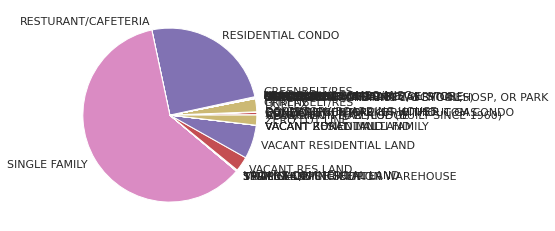

In [16]:
plt.pie(c, labels=c.index)

([<matplotlib.patches.Wedge at 0x7fa32ea4d1d0>,
 [Text(1.0997866331239032, 0.021664754833355445, 'APARTMENT: LOW RISE (BUILT SINCE 1960)'),
  Text(1.0238668611063342, 0.4021152207120025, 'CHURCH'),
  Text(0.827767382243521, 0.7244316122959494, 'CLUB/UNION HALL/LODGE'),
  Text(-1.0997866326801902, -0.021664777357923642, 'CONDO'),
  Text(1.0352987124611832, -0.37169419685571675, 'CONDOMINIUM OFC  OR OTHER COM CONDO')])

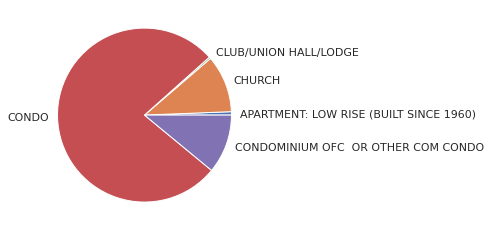

In [17]:
plt.pie(x, labels=x.index)

([<matplotlib.patches.Wedge at 0x7fa32d8d9e50>,
 [Text(-0.8268380617993045, 0.7254921223279889, 'VACANT RESIDENTIAL LAND'),
  Text(0.14525367583326007, -1.0903675387945693, 'VACANT RESIENTIAL LAND'),
  Text(0.14897456364819864, -1.0898653950767632, 'VACANT RURAL LAND'),
  Text(0.1519500263236376, -1.0894545376013842, 'VACANT ZONED MULTI FAMILY'),
  Text(0.8302954091959394, -0.7215327667321476, 'ZERO LOT LINE')])

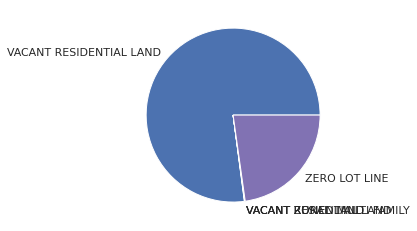

In [18]:
plt.pie(y, labels=y.index)

1.What is the average age of the properties?

In [19]:
data['Age']=data['Year']-data['YearBuilt']
data

,LandUse,PropertyAddress,SaleDate,SalePrice,Acre,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBathroom,HalfBathroom,Year,Month,Day,Pin,Property,Age
UniqueID,,,,,,,,,,,,,,,,,,
2045.0,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000.0,2.300000,50000.000000,168200.000000,235700.000000,1986.000000,3.000000,3.000000,0.000000,2013,4,9,1808,", GOODLETTSVIL",27.000000
16918.0,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000.0,3.500000,50000.000000,264100.000000,319000.000000,1998.000000,3.000000,3.000000,2.000000,2014,6,10,1832,", GOODLETTSVIL",16.000000
54582.0,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000.0,2.900000,50000.000000,216200.000000,298000.000000,1987.000000,4.000000,3.000000,0.000000,2016,9,26,1864,", GOODLETTSVIL",29.000000
43070.0,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000.0,2.600000,50000.000000,147300.000000,197300.000000,1985.000000,3.000000,3.000000,0.000000,2016,1,29,1853,", GOODLETTSVIL",31.000000
22714.0,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000.0,2.000000,50000.000000,152300.000000,202300.000000,1984.000000,4.000000,3.000000,0.000000,2014,10,10,1829,", GOODLETTSVIL",30.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30469.0,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE",2015-05-27,157500.0,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2015,5,27,1435,"K DR, NOLENSVI",51.255101
27707.0,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE",2015-03-02,145000.0,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2015,3,2,1423,"K DR, NOLENSVI",51.255101
52709.0,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE",2016-08-16,234611.0,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2016,8,16,1804,"LN, NOLENSVILL",52.255101


In [20]:
np.mean(data["Age"])

50.851609087029125

1.Have the age of houses affected the price?

In [21]:
e=data.groupby('Age')['SalePrice'].count()
e

Age
-4.0         1
-3.0        27
-2.0       147
-1.0       608
 0.0      1100
          ... 
 126.0       1
 134.0       1
 145.0       2
 184.0       1
 216.0       1
Name: SalePrice, Length: 134, dtype: int64

In [22]:
e.head()

Age
-4.0       1
-3.0      27
-2.0     147
-1.0     608
 0.0    1100
Name: SalePrice, dtype: int64

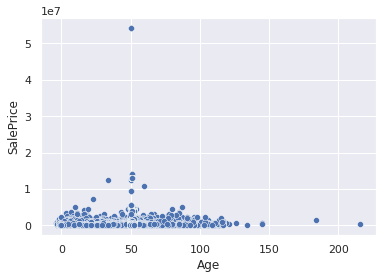

In [23]:
sns.scatterplot(x='Age', y='SalePrice', data=data);

1.Have the number of rooms in the house affected the price?

In [24]:
data["TotalRooms"]=data['Bedrooms']+data['FullBathroom']+data['HalfBathroom']
data

,LandUse,PropertyAddress,SaleDate,SalePrice,Acre,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBathroom,HalfBathroom,Year,Month,Day,Pin,Property,Age,TotalRooms
UniqueID,,,,,,,,,,,,,,,,,,,
2045.0,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000.0,2.300000,50000.000000,168200.000000,235700.000000,1986.000000,3.000000,3.000000,0.000000,2013,4,9,1808,", GOODLETTSVIL",27.000000,6.000000
16918.0,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000.0,3.500000,50000.000000,264100.000000,319000.000000,1998.000000,3.000000,3.000000,2.000000,2014,6,10,1832,", GOODLETTSVIL",16.000000,8.000000
54582.0,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000.0,2.900000,50000.000000,216200.000000,298000.000000,1987.000000,4.000000,3.000000,0.000000,2016,9,26,1864,", GOODLETTSVIL",29.000000,7.000000
43070.0,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000.0,2.600000,50000.000000,147300.000000,197300.000000,1985.000000,3.000000,3.000000,0.000000,2016,1,29,1853,", GOODLETTSVIL",31.000000,6.000000
22714.0,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000.0,2.000000,50000.000000,152300.000000,202300.000000,1984.000000,4.000000,3.000000,0.000000,2014,10,10,1829,", GOODLETTSVIL",30.000000,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30469.0,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE",2015-05-27,157500.0,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2015,5,27,1435,"K DR, NOLENSVI",51.255101,5.259848
27707.0,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE",2015-03-02,145000.0,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2015,3,2,1423,"K DR, NOLENSVI",51.255101,5.259848
52709.0,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE",2016-08-16,234611.0,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2016,8,16,1804,"LN, NOLENSVILL",52.255101,5.259848


In [25]:
d=data.groupby('TotalRooms')['SalePrice'].count()
d

TotalRooms
0.000000        40
1.000000         2
2.000000        95
3.000000      3450
3.089912       118
3.283921         1
4.000000      4243
4.283921         7
5.000000      7366
5.169936         1
5.259848     32201
5.283921        46
6.000000      4545
6.283921        55
7.000000      1961
7.283921        18
8.000000      1102
8.089912         1
8.283921         4
9.000000       541
10.000000      304
11.000000      202
12.000000       94
13.000000       48
14.000000       19
15.000000        6
16.000000        2
17.000000        2
20.000000        2
22.000000        1
Name: SalePrice, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


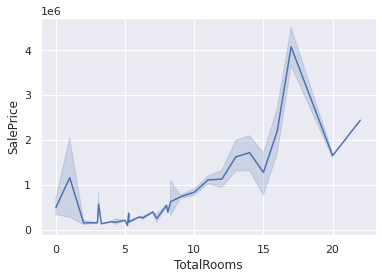

In [26]:
sns.lineplot('TotalRooms','SalePrice',data=data);

1.Does the size of the property (no. of acres) have any influence in its price?

In [27]:
e=data.groupby('Acre')['SalePrice'].count()
e

Acre
0.01       4
0.02       6
0.03       6
0.04      12
0.05      22
          ..
47.50      1
51.34      1
62.96      1
68.79      1
160.06     1
Name: SalePrice, Length: 520, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


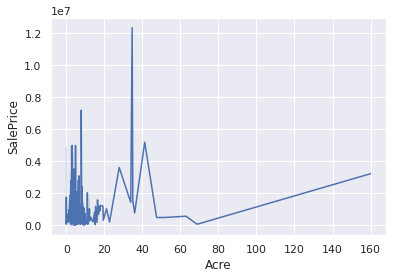

In [28]:
sns.lineplot('Acre', 'SalePrice', data=data);

1.Are houses located in specific pin numbers expensive over the others?

In [29]:
f=data.groupby('SalePrice')['Pin'].count()
f

SalePrice
50.0           1
100.0          2
500.0          1
750.0          1
800.0          2
              ..
10750000.0     1
12350000.0     2
13156000.0    92
14100000.0    23
54278060.0     7
Name: Pin, Length: 8081, dtype: int64

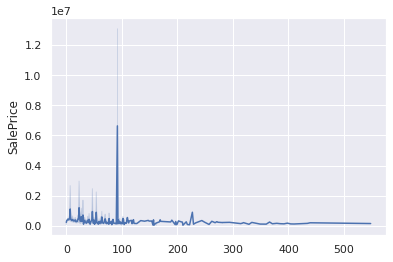

In [30]:
sns.lineplot(x=f.values,y=f.index)

1.How have house prices changed in the 21st centuary as supposed to 20th centuary.

In [31]:
g=data.groupby('Year')['BuildingValue'].count()
g

Year
2013    11292
2014    14283
2015    16829
2016    14071
2019        2
Name: BuildingValue, dtype: int64

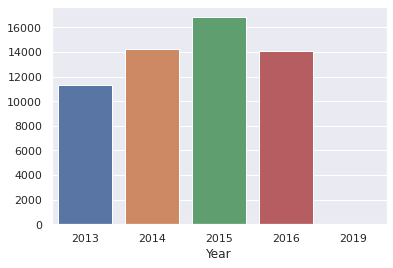

In [32]:
sns.barplot(x=g.index,y=g.values)

In [33]:
cent=data[data["YearBuilt"]>=1900]
cent

,LandUse,PropertyAddress,SaleDate,SalePrice,Acre,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBathroom,HalfBathroom,Year,Month,Day,Pin,Property,Age,TotalRooms
UniqueID,,,,,,,,,,,,,,,,,,,
2045.0,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000.0,2.300000,50000.000000,168200.000000,235700.000000,1986.000000,3.000000,3.000000,0.000000,2013,4,9,1808,", GOODLETTSVIL",27.000000,6.000000
16918.0,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000.0,3.500000,50000.000000,264100.000000,319000.000000,1998.000000,3.000000,3.000000,2.000000,2014,6,10,1832,", GOODLETTSVIL",16.000000,8.000000
54582.0,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000.0,2.900000,50000.000000,216200.000000,298000.000000,1987.000000,4.000000,3.000000,0.000000,2016,9,26,1864,", GOODLETTSVIL",29.000000,7.000000
43070.0,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000.0,2.600000,50000.000000,147300.000000,197300.000000,1985.000000,3.000000,3.000000,0.000000,2016,1,29,1853,", GOODLETTSVIL",31.000000,6.000000
22714.0,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000.0,2.000000,50000.000000,152300.000000,202300.000000,1984.000000,4.000000,3.000000,0.000000,2014,10,10,1829,", GOODLETTSVIL",30.000000,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30469.0,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE",2015-05-27,157500.0,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2015,5,27,1435,"K DR, NOLENSVI",51.255101,5.259848
27707.0,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE",2015-03-02,145000.0,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2015,3,2,1423,"K DR, NOLENSVI",51.255101,5.259848
52709.0,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE",2016-08-16,234611.0,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2016,8,16,1804,"LN, NOLENSVILL",52.255101,5.259848


In [34]:
g=data.groupby('YearBuilt')['BuildingValue'].count()
g

YearBuilt
1799.0      1
1832.0      1
1870.0      2
1880.0      1
1890.0      1
         ... 
2013.0    297
2014.0    526
2015.0    712
2016.0    600
2017.0     13
Name: BuildingValue, Length: 127, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


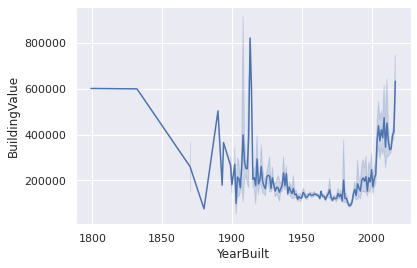

In [35]:
sns.lineplot('YearBuilt', 'BuildingValue', data=data);